## Data Collection

In [1]:
!python3 --version

Python 3.11.0


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('car_price_prediction_data.csv')

In [4]:
df.shape

(11914, 16)

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [9]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [11]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price                  int64
dtype: object

In [13]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
cat_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_') 

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [16]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

price
[46135 40650 36350 29450 34

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='price', ylabel='Count'>

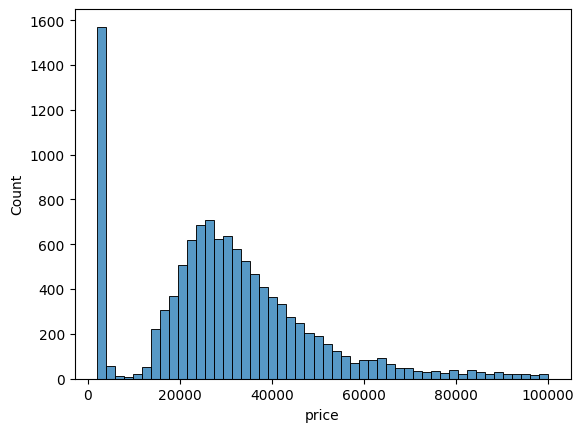

In [18]:
sns.histplot(df.price[df.price < 100000], bins=50)

In [19]:
np.log1p([0, 1, 10, 100, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [20]:
price_logs = np.log1p(df.price)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: price, Length: 11914, dtype: float64

In [ ]:
sns.histplot(price_logs, bins=50)

<Axes: xlabel='price', ylabel='Count'>

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

## Dataset Splitting

In [ ]:
n_data = len(df)
n_val = int(0.2 * n_data)
n_test = int(0.2 * n_data)
n_train = int(n_data - (n_val + n_test))

In [ ]:
(n_data, n_val, n_test, n_train)

In [ ]:
assert n_train + n_val + n_test == n_data

In [ ]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [ ]:
df_train.head()

In [ ]:
idx = np.arange(n_data)
idx

In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
df_train.head()

In [ ]:
len(df_train), len(df_val), len(df_test)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_train.head()

In [ ]:
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

In [ ]:
len(y_train), len(y_val), len(y_test)

In [ ]:
del df_train['price']
del df_val['price']
del df_test['price']

In [ ]:
df.shape, df_train.shape, df_val.shape, df_test.shape

## Training Linear Regression

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [ ]:
def prepare_X(df):
    df_prep = df[base]
    df_prep = df_prep.fillna(0)
    X = df_prep.values
    return X

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)

In [ ]:
y_pred

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Evaluation

In [ ]:
def rmse(y, y_pred):
    err = y - y_pred
    sq_err = err ** 2
    mse = sq_err.mean()
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
rmse(y_train, y_pred)

## Feature Engineering

In [ ]:
def prepare_feature_engineered_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    df_prep = df[features]
    df_prep = df_prep.fillna(0)
    X = df_prep.values
    return X

In [ ]:
X_train = prepare_feature_engineered_X(df_train)

In [ ]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

In [ ]:
X_val = prepare_feature_engineered_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## CATEGORICAL VARIABLES

In [ ]:
df_train.dtypes

In [ ]:
n_doors_list = [2, 3, 4] #number_of_doors is categorical

In [ ]:
def prepare_feature_engineered_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for d in n_doors_list:
        df['num_of_doors_%s' %d] = (df['number_of_doors'] == d).astype('int')
        features.append('num_of_doors_%s' %d)
    
    df_prep = df[features]
    df_prep = df_prep.fillna(0)
    X = df_prep.values
    return X

In [ ]:
X_train = prepare_feature_engineered_X(df_train)

In [ ]:
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

In [ ]:
cat_columns = [
    'make', 'model', 'engine_fuel_type', 'transmission_type', 'market_category', 'vehicle_size', 'vehicle_style'
]

categorical = {}

for c in cat_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [ ]:
def prepare_feature_engineered_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')

    for d in n_doors_list:
        df['num_of_doors_%s' %d] = (df['number_of_doors'] == d).astype('int')
        features.append('num_of_doors_%s' %d)

    for key, values in categorical.items():
        for value in values:
            df['%s_%s' % (key,value)] = (df[key] == value).astype('int')
            features.append('%s_%s' %(key,value))
            
    df_prep = df[features]
    df_prep = df_prep.fillna(0)
    X = df_prep.values
    return X

In [ ]:
X_train = prepare_feature_engineered_X(df_train)

w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

## Regularization

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare_feature_engineered_X(df_train)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)

In [ ]:
X_val = prepare_feature_engineered_X(df_val)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

## Parameter Tuning

In [ ]:
for r in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_feature_engineered_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_feature_engineered_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r,w_0,score)

In [ ]:
r = 0.1 #best tuning rmse score

X_train = prepare_feature_engineered_X(df_train)
X_val = prepare_feature_engineered_X(df_val)

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
train_score = rmse(y_train, y_pred)
print('train_score', train_score)

y_pred = w_0 + X_val.dot(w)
test_score = rmse(y_val, y_pred)
print('test_score', test_score)

## Concatenate Train and Validation Data For Model Use and Testing

In [ ]:
df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)

X_train_val = prepare_feature_engineered_X(df_train_val)
X_train_val

In [ ]:
y_train_val = np.concatenate([y_train, y_val])

In [ ]:
r = 0.1
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=r)

X_test = prepare_feature_engineered_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

## Car Price Prediction

In [ ]:
car = df_test.iloc[20].to_dict()
car

In [ ]:
df_car = pd.DataFrame([car])

In [ ]:
df_car.head()

In [ ]:
X_car = prepare_feature_engineered_X(df_car)
y_pred = w_0 + X_test.dot(w)
y_pred = y_pred[0]
print(y_pred)